<a href="https://colab.research.google.com/github/gregroudoudou/M1-Programmation-/blob/Entra%C3%AEnements-python-des-notions-de-cours-Personnels/S%C3%A9ries_temp_causal%3B_Boostraped_%2BBlock_cluster_erreurs_standards_rob_Boostrap_division_al%C3%A9atoire_puis_s%C3%A9lection_al%C3%A9atoire_d'%C3%A9chantillons_sous_Python_de_Trabelsi_(%C3%A9l%C3%A9ments_vite_fait_parler)_simlations_en_boostrap_SE_Trabelsi_exemples_sous_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np

# 1. Données
data = np.array([2.3, 2.5, 2.7, 2.9, 3.0,
                 3.2, 3.3, 3.4, 3.8, 4.1,
                 4.2, 4.3, 4.3, 4.4, 4.5,
                 4.7, 4.9, 5.1, 5.3, 5.5])

# 2. Fonction de bootstrap
def bootstrap_mean(data, n_bootstrap=10000):
    """
    data: array-like
        Données initiales
    n_bootstrap: int
        Nombre de répliques bootstrap
    """
    n = len(data)
    means = np.empty(n_bootstrap)  # pour stocker les moyennes

    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)

    return means

# 3. Exécuter la simulation
bootstrap_results = bootstrap_mean(data, n_bootstrap=10000)

# 4. Analyse
moy_empirique = np.mean(data)
print(f"Moyenne empirique : {moy_empirique:.4f}")

moy_bootstrap = np.mean(bootstrap_results)
print(f"Moyenne bootstrap : {moy_bootstrap:.4f}")

ic_95_inf = np.percentile(bootstrap_results, 2.5)
ic_95_sup = np.percentile(bootstrap_results, 97.5)
print(f"Intervalle de confiance à 95% : [{ic_95_inf:.4f}, {ic_95_sup:.4f}]")


Moyenne empirique : 3.9200
Moyenne bootstrap : 3.9203
Intervalle de confiance à 95% : [3.5100, 4.3200]


n (ou parfois len(data) : correspond généralement au nombre d’observations dans l’échantillon d’origine.
n_bootstrap : correspond au nombre de répliques (c’est-à-dire le nombre de fois qu’on va tirer un nouvel échantillon de taille n avec remise).

Dans un essai clinique, on compare deux traitements différents (A et B) pour voir lequel est le plus efficace. Vous avez deux échantillons de tailles différentes, contenant les mesures d’efficacité (par exemple, tension artérielle avant/après traitement ou niveau de cholestérol réduit, etc.).

Comment le bootstrap intervient ?
Échantillon A : données du groupe A, de taille n₁.
Échantillon B : données du groupe B, de taille n₂.
Vous estimez la différence de moyennes (ex.
𝑋
ˉ
𝐴
−
𝑋
ˉ
𝐵
X
ˉ
  
A
​
 −
X
ˉ
  
B
​
 ).
Pour obtenir un intervalle de confiance de cette différence, vous générez des répliques bootstrap séparément pour A et pour B (à chaque réplique, vous tirez avec remise dans chaque groupe).
Vous calculez la différence de moyennes pour chaque réplique.
Vous examinez la distribution de ces différences pour en extraire un IC (par exemple, un IC à 95 % via les quantiles 2.5 % et 97.5 %).

3. Avoir  une validation d'un modèle en machine learning : tester l'écart en termes de R2 ou de score F1....etc !


In [25]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ---------------------------------------------------------------------
# 1. Génération d'un dataset fictif (binaire) avec 1000 échantillons
# ---------------------------------------------------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# ---------------------------------------------------------------------
# 2. Séparation en jeu d'entraînement et de test
# ---------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# ---------------------------------------------------------------------
# 3. Entraînement d'un modèle (Logistic Regression)
# ---------------------------------------------------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# ---------------------------------------------------------------------
# 4. Évaluation sur l'ensemble de test (score "brut")
# ---------------------------------------------------------------------
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu de test : {accuracy_test:.3f}")

# ---------------------------------------------------------------------
# 5. Méthode du bootstrap pour estimer l'incertitude
# ---------------------------------------------------------------------

# Indices du jeu de test (on va piocher avec remise là-dedans)
test_indices = np.arange(len(X_test))

# Nombre de rééchantillonnages bootstrap
n_bootstrap = 1000

# Pour stocker la précision calculée à chaque réplique
bootstrap_accuracies = np.empty(n_bootstrap)

# Boucle de rééchantillonnage
for i in range(n_bootstrap):
    # Tirage avec remise parmi les indices du test
    sample_indices = np.random.choice(test_indices,
                                      size=len(test_indices),
                                      replace=True)

    # On récupère X et y correspondant aux indices choisis : =les mélanges de plusiuers années...!/indices d'échantillons :
    X_sample = X_test[sample_indices]
    y_sample = y_test[sample_indices]

    # On calcule la prédiction du même modèle sur cet échantillon bootstrap
    y_pred_sample = model.predict(X_sample)

    # On mesure la précision pour tout les modeles:
    bootstrap_accuracies[i] = accuracy_score(y_sample, y_pred_sample)

# ---------------------------------------------------------------------
# 6. Analyse des résultats bootstrap
# ---------------------------------------------------------------------
accuracy_mean = np.mean(bootstrap_accuracies)
accuracy_std = np.std(bootstrap_accuracies, ddof=1)

# Intervalle de confiance à 95% (méthode percentiles)
ci_lower = np.percentile(bootstrap_accuracies, 2.5)
ci_upper = np.percentile(bootstrap_accuracies, 97.5)

print(f"Accuracy moyenne (bootstrap) : {accuracy_mean:.3f}")
print(f"Ecart-type (bootstrap)       : {accuracy_std:.3f}")
print(f"IC 95% (bootstrap)           : [{ci_lower:.3f}, {ci_upper:.3f}]")


Accuracy sur le jeu de test : 0.823
Accuracy moyenne (bootstrap) : 0.823
Ecart-type (bootstrap)       : 0.023
IC 95% (bootstrap)           : [0.780, 0.867]


Quand vous avez un jeu de données (par exemple, un ensemble de test ou un ensemble de validation) et que vous voulez connaître la précision ou le score F1 d’un modèle, vous pouvez :

Créer plusieurs échantillons bootstrap du jeu de test (toujours avec remise).
Évaluer votre modèle sur chacun de ces échantillons.
Analyser la distribution des performances mesurées : moyenne, écart-type, quantiles.
Cela vous donne une idée de la variabilité de la mesure de performance. Vous pouvez par exemple dire

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ---------------------------------------------------------------------
# 1. Génération d'un dataset fictif (binaire) avec 1000 échantillons
# ---------------------------------------------------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# ---------------------------------------------------------------------
# 2. Séparation en jeu d'entraînement et de test
# ---------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# ---------------------------------------------------------------------
# 3. Entraînement d'un modèle (Logistic Regression)
# ---------------------------------------------------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# ---------------------------------------------------------------------
# 4. Évaluation sur l'ensemble de test (score "brut")
# ---------------------------------------------------------------------
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu de test : {accuracy_test:.3f}")

# ---------------------------------------------------------------------
# 5. Méthode du bootstrap pour estimer l'incertitude
# ---------------------------------------------------------------------

# Indices du jeu de test (on va piocher avec remise là-dedans)
test_indices = np.arange(len(X_test))

# Nombre de rééchantillonnages bootstrap
n_bootstrap = 1000

# Pour stocker la précision calculée à chaque réplique
bootstrap_accuracies = np.empty(n_bootstrap)

# Boucle de rééchantillonnage
for i in range(n_bootstrap):
    # Tirage avec remise parmi les indices du test
    sample_indices = np.random.choice(test_indices,
                                      size=len(test_indices),
                                      replace=True)

    # On récupère X et y correspondant aux indices choisis
    X_sample = X_test[sample_indices]
    y_sample = y_test[sample_indices]

    # On calcule la prédiction du même modèle sur cet échantillon bootstrap
    y_pred_sample = model.predict(X_sample)

    # On mesure la précision
    bootstrap_accuracies[i] = accuracy_score(y_sample, y_pred_sample)

# ---------------------------------------------------------------------
# 6. Analyse des résultats bootstrap
# ---------------------------------------------------------------------
accuracy_mean = np.mean(bootstrap_accuracies)
accuracy_std = np.std(bootstrap_accuracies, ddof=1)

# Intervalle de confiance à 95% (méthode percentiles)
ci_lower = np.percentile(bootstrap_accuracies, 2.5)
ci_upper = np.percentile(bootstrap_accuracies, 97.5)

print(f"Accuracy moyenne (bootstrap) : {accuracy_mean:.3f}")
print(f"Ecart-type (bootstrap)       : {accuracy_std:.3f}")
print(f"IC 95% (bootstrap)           : [{ci_lower:.3f}, {ci_upper:.3f}]")


4.Exemples de comparaison random forest avec le reste , notamment en partant

5.BOOstrap sur les indices des "folds": càdire qu'on en réplique certain, dès fois , dès fois pas afin de tester la STABILITE de l'INDICATEUR !


In [26]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ---------------------------------------------------------------------
# 1. Génération d'un dataset fictif (binaire) avec 1000 échantillons
# ---------------------------------------------------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# ---------------------------------------------------------------------
# 2. Séparation en jeu d'entraînement et de test
# ---------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# ---------------------------------------------------------------------
# 3. Entraînement de deux modèles :
#    - Logistic Regression
#    - Random Forest
# ---------------------------------------------------------------------
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# ---------------------------------------------------------------------
# 4. Évaluation initiale sur l'ensemble de test (score "brut")
# ---------------------------------------------------------------------
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

diff_accuracy = accuracy_rf - accuracy_lr

print("=== Accuracy sur le jeu de test ===")
print(f"  - Logistic Regression : {accuracy_lr:.3f}")
print(f"  - Random Forest      : {accuracy_rf:.3f}")
print(f"  - Différence (RF - LR) : {diff_accuracy:.3f}\n")

# ---------------------------------------------------------------------
# 5. Méthode du bootstrap pour comparer les deux modèles
# ---------------------------------------------------------------------

# Indices du jeu de test (on va piocher avec remise là-dedans)
test_indices = np.arange(len(X_test))

# Nombre de rééchantillonnages bootstrap
n_bootstrap = 2000

# Pour stocker la précision calculée à chaque réplique
bootstrap_acc_lr = np.empty(n_bootstrap)
bootstrap_acc_rf = np.empty(n_bootstrap)
bootstrap_diff   = np.empty(n_bootstrap)

# Boucle de rééchantillonnage
for i in range(n_bootstrap):
    # Tirage avec remise parmi les indices du test
    sample_indices = np.random.choice(test_indices,
                                      size=len(test_indices),
                                      replace=True)

    # On récupère X et y correspondant aux indices choisis
    X_sample = X_test[sample_indices]
    y_sample = y_test[sample_indices]

    # On calcule les prédictions de chaque modèle
    y_pred_sample_lr = model_lr.predict(X_sample)
    y_pred_sample_rf = model_rf.predict(X_sample)

    # On mesure l'accuracy de chaque modèle
    acc_lr = accuracy_score(y_sample, y_pred_sample_lr)
    acc_rf = accuracy_score(y_sample, y_pred_sample_rf)

    # On stocke
    bootstrap_acc_lr[i] = acc_lr
    bootstrap_acc_rf[i] = acc_rf
    bootstrap_diff[i]   = acc_rf - acc_lr

# ---------------------------------------------------------------------
# 6. Analyse des résultats bootstrap
# ---------------------------------------------------------------------
acc_lr_mean = np.mean(bootstrap_acc_lr)
acc_lr_std  = np.std(bootstrap_acc_lr, ddof=1)
ci_lr_lower = np.percentile(bootstrap_acc_lr, 2.5)
ci_lr_upper = np.percentile(bootstrap_acc_lr, 97.5)

acc_rf_mean = np.mean(bootstrap_acc_rf)
acc_rf_std  = np.std(bootstrap_acc_rf, ddof=1)
ci_rf_lower = np.percentile(bootstrap_acc_rf, 2.5)
ci_rf_upper = np.percentile(bootstrap_acc_rf, 97.5)

diff_mean = np.mean(bootstrap_diff)
diff_std  = np.std(bootstrap_diff, ddof=1)
ci_diff_lower = np.percentile(bootstrap_diff, 2.5)
ci_diff_upper = np.percentile(bootstrap_diff, 97.5)

print("=== Résultats bootstrap ===")
print("--> Logistic Regression :")
print(f"  - Moyenne accuracy : {acc_lr_mean:.3f}")
print(f"  - Ecart-type       : {acc_lr_std:.3f}")
print(f"  - IC 95%           : [{ci_lr_lower:.3f}, {ci_lr_upper:.3f}]\n")

print("--> Random Forest :")
print(f"  - Moyenne accuracy : {acc_rf_mean:.3f}")
print(f"  - Ecart-type       : {acc_rf_std:.3f}")
print(f"  - IC 95%           : [{ci_rf_lower:.3f}, {ci_rf_upper:.3f}]\n")

print("--> Différence (RF - LR) :")
print(f"  - Moyenne diff : {diff_mean:.3f}")
print(f"  - Ecart-type   : {diff_std:.3f}")
print(f"  - IC 95%       : [{ci_diff_lower:.3f}, {ci_diff_upper:.3f}]")


=== Accuracy sur le jeu de test ===
  - Logistic Regression : 0.823
  - Random Forest      : 0.940
  - Différence (RF - LR) : 0.117

=== Résultats bootstrap ===
--> Logistic Regression :
  - Moyenne accuracy : 0.823
  - Ecart-type       : 0.022
  - IC 95%           : [0.780, 0.867]

--> Random Forest :
  - Moyenne accuracy : 0.940
  - Ecart-type       : 0.014
  - IC 95%           : [0.913, 0.967]

--> Différence (RF - LR) :
  - Moyenne diff : 0.117
  - Ecart-type   : 0.023
  - IC 95%       : [0.070, 0.163]


5. Estimer les METRIQUES : avec random forest : !

In [29]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# ---------------------------------------------------------------------
# 1. Génération d'un dataset factice (classification binaire)
# ---------------------------------------------------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# ---------------------------------------------------------------------
# 2. Configuration du Stratified K-Fold
#    - n_splits=5 => 5 sous-échantillons
#    - shuffle=True + random_state=42 => reproductibilité des tirages
# ---------------------------------------------------------------------
skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

# Pour stocker les mesures de performance à chaque split
scores = []

# ---------------------------------------------------------------------
# 3. Boucle sur les splits
# ---------------------------------------------------------------------
for train_index, test_index in skf.split(X, y):
    # Création des ensembles d'entraînement et de test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Instanciation du Random Forest
    model = RandomForestClassifier(
        n_estimators=100,   # nombre d'arbres
        max_depth=None,     # profondeur max (None => pas de limite)
        random_state=42
    )

    # Entraînement sur le fold courant
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test du fold
    y_pred = model.predict(X_test)

    # Calcul de l'accuracy pour ce fold
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# ---------------------------------------------------------------------
# 4. Résultats finaux
# ---------------------------------------------------------------------
mean_score = np.mean(scores)
std_score = np.std(scores, ddof=1)

print(f"Scores de précision (accuracy) par fold : {scores}")
print(f"Moyenne des scores : {mean_score:.3f}")
print(f"Ecart-type         : {std_score:.3f}")


Scores de précision (accuracy) par fold : [0.9402985074626866, 0.8955223880597015, 0.8805970149253731, 0.9552238805970149, 0.9552238805970149, 0.9701492537313433, 0.8955223880597015, 0.9552238805970149, 0.9104477611940298, 0.9701492537313433, 0.9242424242424242, 0.8787878787878788, 0.9545454545454546, 0.9393939393939394, 0.8939393939393939]
Moyenne des scores : 0.928
Ecart-type         : 0.033


In [40]:
def stratified_bootstrap(X, y, n_samples=None):
    """
    X : features
    y : labels (classes)
    n_samples : taille de l'échantillon final à tirer (par défaut len(X))

    Retourne (X_boot, y_boot), un bootstrap stratifié de X, y
    """
    if n_samples is None:
        n_samples = len(X)

    # Séparation par classes
    unique_classes, counts = np.unique(y, return_counts=True)
    proportions = counts / len(y)

    # On stocke ici les échantillons
    X_boot = []
    y_boot = []

    for cls, prop in zip(unique_classes, proportions):
        # on filtre pour prendre que les éléments de cette classe
        X_cls = X[y == cls]
        y_cls = y[y == cls]

        # nb d'éléments à piocher pour cette classe,
        # sur la base des proportions * n_samples
        n_cls_samples = int(round(prop * n_samples))

        # tirage bootstrap avec remise
        idx_choice = np.random.choice(
            np.arange(len(X_cls)),
            size=n_cls_samples,
            replace=True
        )

        # ajout aux listes
        X_boot.append(X_cls[idx_choice])
        y_boot.append(y_cls[idx_choice])

    # concaténer (attention à la forme, si c'est un ndarray ou DataFrame)
    X_boot = np.concatenate(X_boot)
    y_boot = np.concatenate(y_boot)

    return X_boot, y_boot


5.Savoir créer un boostrap sur les coeffcieints d'une OLS: vérifier la stabilité d'une régression !

=== OLS classique ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1011.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           1.04e-79
Time:                        17:53:24   Log-Likelihood:                -415.57
No. Observations:                 200   AIC:                             835.1
Df Residuals:                     198   BIC:                             841.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2104      0.2

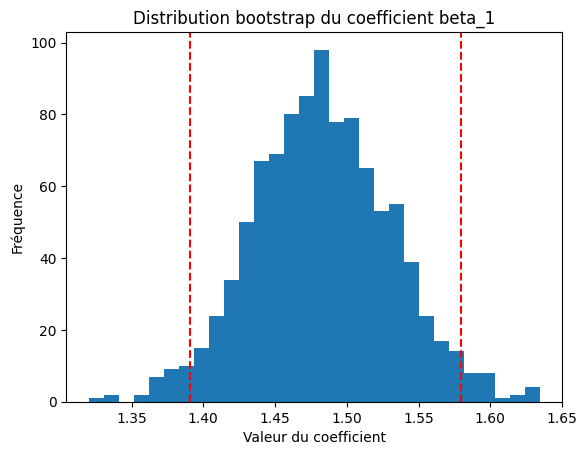

In [41]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# -----------------------------
# 1. Génération des données
# -----------------------------
np.random.seed(42)
n = 200
X = np.random.uniform(0, 10, n)             # X ~ U(0,10)
beta_0, beta_1 = 2.0, 1.5                  # vrais paramètres
epsilon = np.random.normal(0, 2, n)        # bruit ~ N(0, 2^2)

y = beta_0 + beta_1 * X + epsilon

# On prépare X pour statsmodels (ajout de la constante)
X_const = sm.add_constant(X)  # shape = (n,2) => [ [1, X1], [1, X2], ...]

# -----------------------------
# 2. Estimation OLS sur l'échantillon initial
# -----------------------------
model_ols = sm.OLS(y, X_const).fit()
print("=== OLS classique ===")
print(model_ols.summary())

# -----------------------------
# 3. Bootstrap non paramétrique
# -----------------------------
n_boot = 1000
coef_boot = np.empty(n_boot)

for i in range(n_boot):
    # Tirage d'indices avec remise
    idx = np.random.choice(np.arange(n), size=n, replace=True)
    X_boot = X_const[idx, :]
    y_boot = y[idx]

    # Estimation OLS sur l'échantillon bootstrapé
    model_bs = sm.OLS(y_boot, X_boot).fit()
    coef_boot[i] = model_bs.params[1]  # on stocke le coefficient associé à X

# -----------------------------
# 4. Intervalle de confiance empirique pour beta_1
# -----------------------------
beta1_lower = np.percentile(coef_boot, 2.5)
beta1_upper = np.percentile(coef_boot, 97.5)

print("\n=== Résultats Bootstrap (coefficient sur X) ===")
print(f"Moyenne bootstrap : {np.mean(coef_boot):.3f}")
print(f"IC 95% bootstrap  : [{beta1_lower:.3f}, {beta1_upper:.3f}]")

# (Optionnel) Visualisation de la distribution bootstrap
plt.figure()
plt.hist(coef_boot, bins=30)
plt.axvline(beta1_lower, color='r', linestyle='--')
plt.axvline(beta1_upper, color='r', linestyle='--')
plt.title("Distribution bootstrap du coefficient beta_1")
plt.xlabel("Valeur du coefficient")
plt.ylabel("Fréquence")
plt.show()


6.Boostrap en séries temporelles : le Block boostrap

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(123)

# --------------------------------------
# 1. Génération d'un petit panel factice
# --------------------------------------
N = 10   # nombre d'individus
T = 8    # nombre de périodes
total_obs = N * T

# Identifiants individuels
ids = np.repeat(np.arange(N), T)
# Périodes
time = np.tile(np.arange(T), N)

# Variables explicatives
X1 = np.random.normal(size=total_obs)
X2 = np.random.normal(size=total_obs)

# Effet fixe par individu (par ex.)
alpha_i = np.random.normal(loc=0, scale=2, size=N)
# On crée un vecteur alpha correspondant à chaque individu
alpha = alpha_i[ids]

# On ajoute une dépendance temporelle (AR(1)) par ex. dans l'erreur
# Pour la démo, on va le faire de manière simplifiée
epsilon = np.zeros(total_obs)
rho = 0.5  # auto-corr
epsilon[0] = np.random.normal()
for t in range(1, total_obs):
    # on redémarre un cycle quand on change d'individu
    if ids[t] != ids[t-1]:
        epsilon[t] = np.random.normal()
    else:
        epsilon[t] = rho * epsilon[t-1] + np.random.normal()

# On génère la variable dépendante
# Petit modèle: Y = 1 + 0.5*X1 + (-0.3)*X2 + alpha_i + epsilon
true_beta = [1.0, 0.5, -0.3]
Y = true_beta[0] + true_beta[1]*X1 + true_beta[2]*X2 + alpha + epsilon

# On met le tout dans un DataFrame
df = pd.DataFrame({
    'id': ids,
    'time': time,
    'X1': X1,
    'X2': X2,
    'Y': Y
})

# --------------------------------------
# 2. Estimation "naïve" OLS groupé
#    (Sans correction d'effets fixes ou corrélation)
#    Juste pour illustrer le block bootstrap
# --------------------------------------
# On prépare la matrice de régression
X_mat = sm.add_constant(df[['X1','X2']])
y_vec = df['Y']

model = sm.OLS(y_vec, X_mat).fit()
print("\n=== OLS panel naïf (pas de FE) ===")
print(model.summary())

# --------------------------------------
# 3. Block bootstrap sur la dimension temporelle
# --------------------------------------
def block_bootstrap_panel(df, block_len=2):
    """
    On va resampler des blocs temporels [t, t+1, ..., t+block_len-1]
    pour T total = 8 (par ex.).
    On fait l'hypothèse que tous les individus ont la même suite de temps.

    df doit contenir les colonnes: 'id', 'time'
    """
    unique_times = df['time'].unique()
    n_blocks = int(np.ceil(len(unique_times) / block_len))

    # On va tirer n_blocks blocs (avec remise) parmi les "blocs" de temps possibles
    # ex. blocks possibles: [0,1], [1,2], [2,3], ... si block_len=2
    possible_starts = np.arange(0, len(unique_times) - block_len + 1)
    chosen_starts = np.random.choice(possible_starts, size=n_blocks, replace=True)

    # on construit la liste des temps sélectionnés
    sampled_times = []
    for start in chosen_starts:
        block_times = unique_times[start:start+block_len]
        sampled_times.extend(block_times)

    # Au cas où on dépasse T, on tronque :
    sampled_times = sampled_times[:len(unique_times)]

    # On récupère toutes les lignes correspondantes à ces temps, pour tous les individus
    df_boot = df[df['time'].isin(sampled_times)].copy()

    return df_boot

# Nombre de réplicas
n_boot = 300
coefs_boot = np.empty((n_boot, 3))  # on suit [const, X1, X2]

for i in range(n_boot):
    # Tirage de blocs temporels
    df_bs = block_bootstrap_panel(df, block_len=2)

    # On refait un OLS naïf
    X_bs = sm.add_constant(df_bs[['X1','X2']])
    y_bs = df_bs['Y']
    model_bs = sm.OLS(y_bs, X_bs).fit()

    coefs_boot[i, :] = model_bs.params.values  # [const, X1, X2]

# Intervalle de confiance empirique pour chaque param
params_mean = coefs_boot.mean(axis=0)
ci_lower = np.percentile(coefs_boot, 2.5, axis=0)
ci_upper = np.percentile(coefs_boot, 97.5, axis=0)

print("\n=== Block Bootstrap sur le Panel (OLS naïf) ===")
for idx, name in enumerate(['const', 'X1', 'X2']):
    print(f"{name} : Moy = {params_mean[idx]:.3f}, IC95% = [{ci_lower[idx]:.3f}, {ci_upper[idx]:.3f}]")



=== OLS panel naïf (pas de FE) ===
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     7.757
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           0.000853
Time:                        17:55:07   Log-Likelihood:                -157.28
No. Observations:                  80   AIC:                             320.6
Df Residuals:                      77   BIC:                             327.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

7.Boostraped où il y a de fortes corrélations Within à l'intérieur même du groupe entre les variables.

In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(999)

# -----------------------------------
# 1. Génération des données avec groupes
# -----------------------------------
G = 20         # nombre de groupes
mean_size = 30 # taille moyenne par groupe
group_list = []
X_list = []
y_list = []

beta_0, beta_1 = 2.0, 1.0  # paramètres "vrais"

for g in range(G):
    # Taille du groupe = moyenne +/- un peu d'aléatoire
    group_size = np.random.poisson(mean_size) + 10
    # Variable X
    Xg = np.random.normal(loc=g, scale=1.0, size=group_size)
    # Effet fixe (aléatoire) de groupe
    alpha_g = np.random.normal(0, 2)
    # Bruit
    eps = np.random.normal(0, 1, size=group_size)

    yg = beta_0 + alpha_g + beta_1 * Xg + eps

    # On stocke
    group_list.extend([g]*group_size)
    X_list.extend(Xg)
    y_list.extend(yg)

df = pd.DataFrame({
    'group': group_list,
    'X': X_list,
    'Y': y_list
})

# Prépare matrice
Xmat = sm.add_constant(df['X'])
yvec = df['Y']

model_ols_cluster = sm.OLS(yvec, Xmat).fit()
print("=== OLS classique (pas de correction cluster) ===")
print(model_ols_cluster.summary())

# -----------------------------------
# 2. Cluster bootstrap
# -----------------------------------
def cluster_bootstrap(df, group_col='group'):
    """
    Tire des groupes (avec remise),
    puis reprend TOUTES les observations de chaque groupe tiré.
    """
    groups = df[group_col].unique()
    n_groups = len(groups)

    # tirage avec remise des groupes
    chosen_groups = np.random.choice(groups, size=n_groups, replace=True)
    # on construit la base bootstrap
    df_boot = pd.concat([df[df[group_col] == g] for g in chosen_groups], axis=0)

    return df_boot

n_boot = 500
coef_boot = np.empty(n_boot)

for i in range(n_boot):
    df_bs = cluster_bootstrap(df, group_col='group')

    X_bs = sm.add_constant(df_bs['X'])
    y_bs = df_bs['Y']
    model_bs = sm.OLS(y_bs, X_bs).fit()

    # On stocke le coefficient sur X
    coef_boot[i] = model_bs.params['X']

# IC empirique sur beta_1
beta1_lower = np.percentile(coef_boot, 2.5)
beta1_upper = np.percentile(coef_boot, 97.5)
print("\n=== Cluster Bootstrap ===")
print(f"  Moyenne du coeff X    : {coef_boot.mean():.3f}")
print(f"  IC 95% (cluster)       : [{beta1_lower:.3f}, {beta1_upper:.3f}]")


=== OLS classique (pas de correction cluster) ===
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     7116.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:56:03   Log-Likelihood:                -1621.4
No. Observations:                 747   AIC:                             3247.
Df Residuals:                     745   BIC:                             3256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

). Dans de nombreux travaux en économie ou sciences sociales, on dispose de données groupées :

exemple : des ménages appartenant à des villages (cluster = village),
exemple : des travailleurs employés dans une même entreprise (cluster = entreprise),
exemple : des élèves au sein de la même école (cluster = école).
Comme les observations à l’intérieur d’un même cluster sont corrélées (même lieu, même environnement socio-économique, même politique locale, etc.), l’hypothèse d’indépendance habituelle entre chaque observation n’est pas respectée. Les estimateurs classiques d’erreur-standard (et donc d’intervalle de confiance) peuvent être biaisés, généralement en sous-estimant la variance.